In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pyro
import torch
import arviz as az

/home/kajyuuen/.pyenv/versions/3.7.5/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
az.style.use('arviz-darkgrid')

### 2.2.1

In [3]:
np.random.seed(123)
trials = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=trials)
print(data)

[1 0 0 0]


In [4]:
def our_first_model(data):
    theta = pyro.sample("theta", pyro.distributions.Beta(1, 1))
    with pyro.plate("samples", len(data)):
        y = pyro.sample("y", pyro.distributions.Bernoulli(theta), obs=data)

nuts_kernel = pyro.infer.mcmc.NUTS(our_first_model)
mcmc_run = pyro.infer.mcmc.MCMC(nuts_kernel, num_samples=1000, warmup_steps=1000, num_chains=1)
mcmc_run.run(torch.tensor(data).float())

Sample: 100%|██████████| 2000/2000 [00:07, 255.49it/s, step size=7.45e-01, acc. prob=0.940]


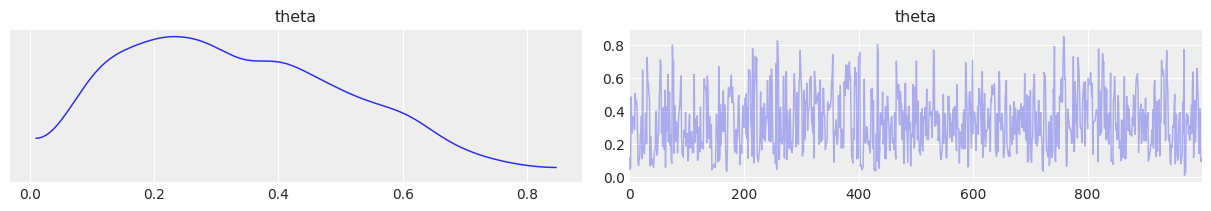

In [5]:
az.plot_trace(mcmc_run)
plt.savefig('B11197_02_01.png')

In [6]:
az.summary(mcmc_run)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.337,0.179,0.045,0.648,0.008,0.006,473.0,462.0,467.0,334.0,NaN


<AxesSubplot:title={'center':'theta\n0'}>

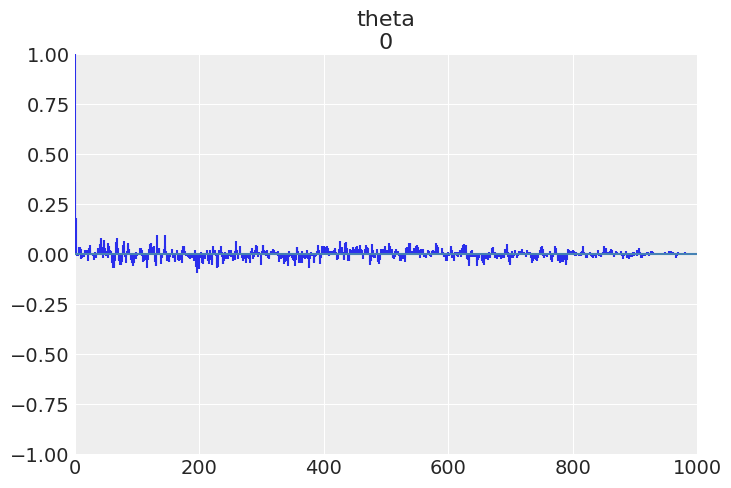

In [7]:
az.plot_autocorr(mcmc_run, var_names=("theta"), max_lag=1000)

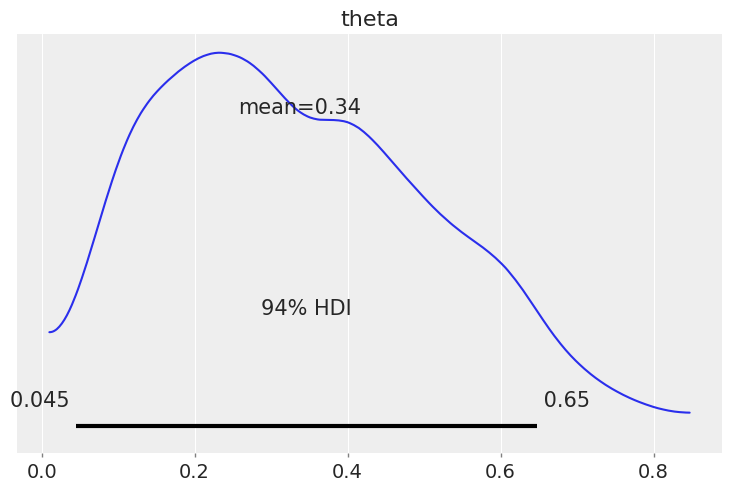

In [8]:
az.plot_posterior(mcmc_run)
plt.savefig('B11197_02_02.png', dpi=300)

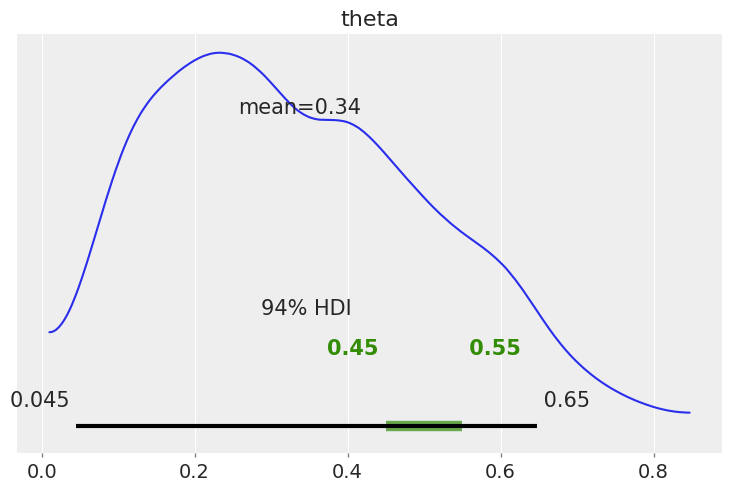

In [9]:
az.plot_posterior(mcmc_run, rope=[0.45, 0.55])
plt.savefig('B11197_02_03.png', dpi=300)

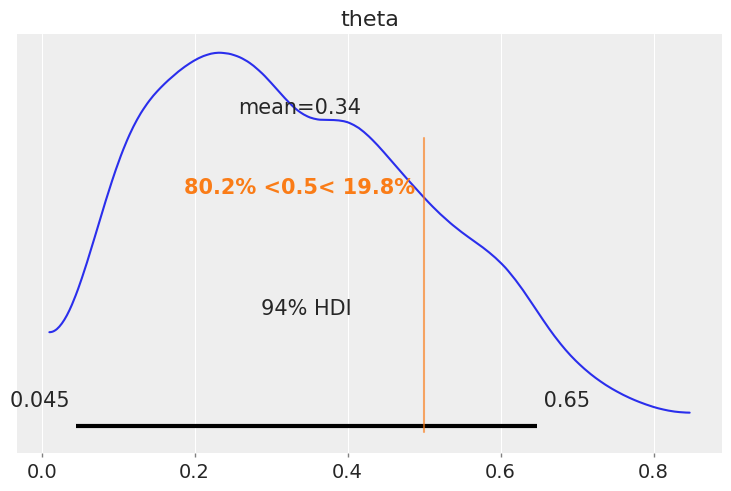

In [10]:
az.plot_posterior(mcmc_run, ref_val=0.5)
plt.savefig('B11197_02_04.png', dpi=300)